The equation which we are trying to solve is:

$$\frac{\partial y}{\partial x} = - 50 (y - \cos(x))$$

It is stiff DE, which means that it is differential equation where the solution varies slowly over a long period, but the problem contains terms that can cause rapid, unstable variation in numerical solutions if a small step size is not used. 

Example is taken from Hairer, E. and Wanner, G. (1996) book.

We are going to solve it with [py-pde](https://py-pde.readthedocs.io/en/stable/index.html). 

Solvers that supported by this package (v. 0.47.2) are: scipy, adams–bashforth, crank-nicolson, explicit, implicit. 

**Direct try**

100%|██████████| 20/20 [00:00<00:00, 43.59it/s]     


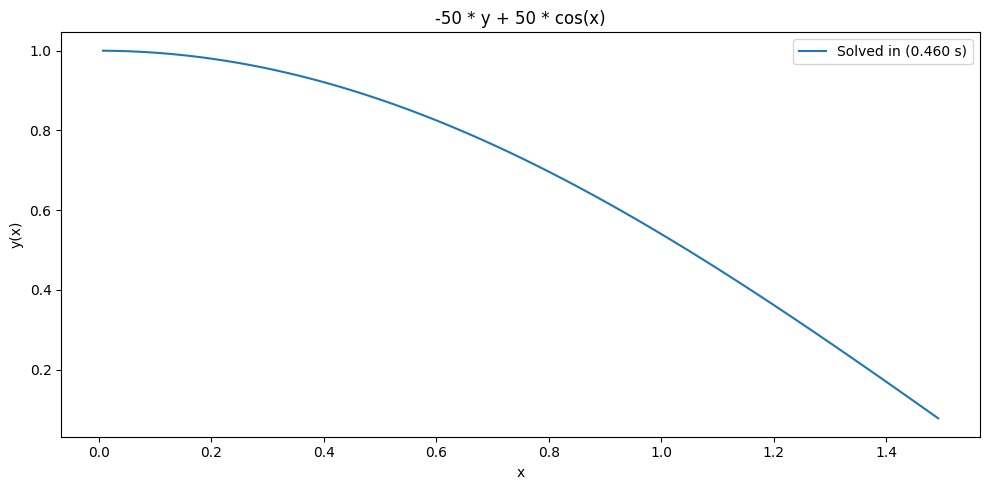

In [11]:
import time

import matplotlib.pyplot as plt

from pde import CartesianGrid, ScalarField, PDE

supported_solvers = {
    'scipy': 'scipy',
    'adams–bashforth': 'adams–bashforth',
    'crank-nicolson': 'crank-nicolson',
    'explicit': 'explicit',
    'implicit': 'implicit',
}

grid = CartesianGrid([[0, 1.5]], 100)
state = ScalarField(grid, data=0.0)

# First example:
# Hairer, E. and Wanner, G. (1996) Solving Ordinary Differential Equations II,
# Stiff Differential-Algebraic Problems. 2nd Edition, Springer-Verlag, Berlin.
eq_to_solve = '-50 * y + 50 * cos(x)'
eq = PDE({'y': eq_to_solve})

t0 = time.time()
result_scipy = eq.solve(
    state,
    t_range=[0, 20],
    dt=0.1,
    solver=supported_solvers['scipy'],
)
t_scipy = time.time() - t0

plt.figure(figsize=(10, 5))
plt.plot(
    grid.axes_coords[0],
    result_scipy.data,
    label=f'Solved in ({t_scipy:.3f} s)',
)

plt.title(eq_to_solve)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.tight_layout()
plt.show()


So, we have obtained the solution with scipy solver. It took around **3s for 100 grids** and **0.1 value for the time step**. 
The correct solution from the book is 

![<title>](solution.png)



Now, let's try another solver. Let's try the simplest **explicit** solver. 

**Explicit solver**

100%|██████████| 50/50 [00:00<00:00, 115.38it/s]    


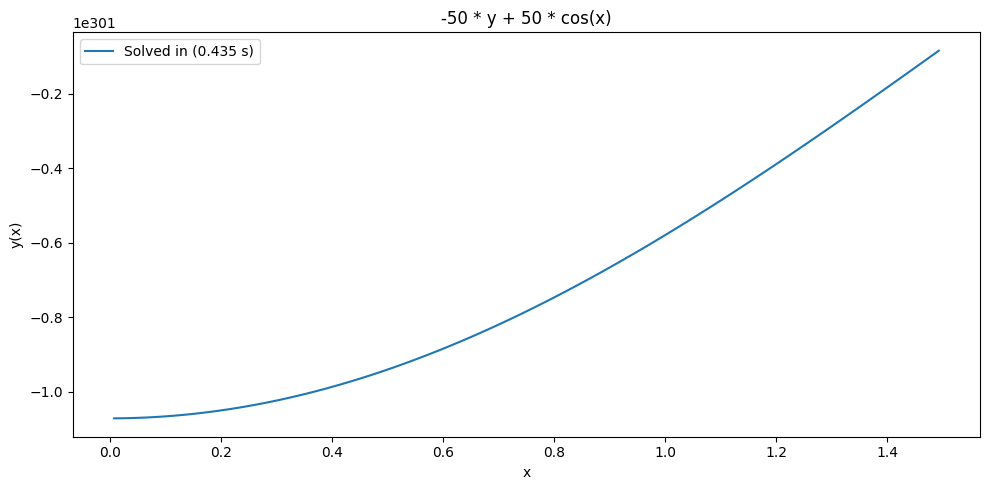

In [ ]:
import time

import matplotlib.pyplot as plt

from pde import CartesianGrid, ScalarField, PDE

supported_solvers = {
    'scipy': 'scipy',
    'adams–bashforth': 'adams–bashforth',
    'crank-nicolson': 'crank-nicolson',
    'explicit': 'explicit',
    'implicit': 'implicit',
}

grid = CartesianGrid([[0, 1.5]], 100)
state = ScalarField(grid, data=0.0)

# First example:
# Hairer, E. and Wanner, G. (1996) Solving Ordinary Differential Equations II,
# Stiff Differential-Algebraic Problems. 2nd Edition, Springer-Verlag, Berlin.
eq_to_solve = '-50 * y + 50 * cos(x)'
eq = PDE({'y': eq_to_solve})

t0 = time.time()
result_scipy = eq.solve(
    state,
    t_range=[0, 20],
    dt=0.1,
    solver=supported_solvers['explicit'],
)
t_scipy = time.time() - t0

plt.figure(figsize=(10, 5))
plt.plot(
    grid.axes_coords[0],
    result_scipy.data,
    label=f'Solved in ({t_scipy:.3f} s)',
)

plt.title(eq_to_solve)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.tight_layout()
plt.show()


Solution is wrong! If we extend the t_range to [0, 100] we'll get the numerical instability. So, to get the correct solution **we must** reduce the step time. From 0.1 to 0.01.

**Explicit solver with shrank step time**

100%|██████████| 20/20 [00:00<00:00, 42.69it/s]     


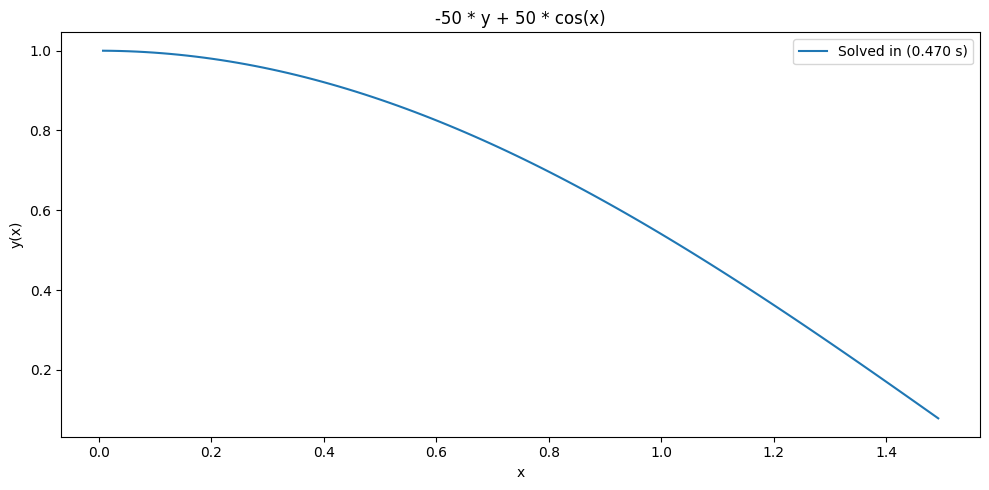

In [18]:
import time

import matplotlib.pyplot as plt

from pde import CartesianGrid, ScalarField, PDE

supported_solvers = {
    'scipy': 'scipy',
    'adams–bashforth': 'adams–bashforth',
    'crank-nicolson': 'crank-nicolson',
    'explicit': 'explicit',
    'implicit': 'implicit',
}

grid = CartesianGrid([[0, 1.5]], 100)
state = ScalarField(grid, data=0.0)

# First example:
# Hairer, E. and Wanner, G. (1996) Solving Ordinary Differential Equations II,
# Stiff Differential-Algebraic Problems. 2nd Edition, Springer-Verlag, Berlin.
eq_to_solve = '-50 * y + 50 * cos(x)'
eq = PDE({'y': eq_to_solve})

t0 = time.time()
result_scipy = eq.solve(
    state,
    t_range=[0, 20],
    dt=0.01,
    solver=supported_solvers['explicit'],
)
t_scipy = time.time() - t0

plt.figure(figsize=(10, 5))
plt.plot(
    grid.axes_coords[0],
    result_scipy.data,
    label=f'Solved in ({t_scipy:.3f} s)',
)

plt.title(eq_to_solve)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.tight_layout()
plt.show()

**Questions:**

1. Difference between scipy and implicit ?
2. What scipy uses inside when we call it from pde?
3. Can we choose the solver inside scipy? For example, can we call Radau inside scipy?